In [9]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd

# 可視化モジュール
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習モジュール
import sklearn

# 小数第３まで表示
%precision 3

'%.3f'

In [10]:
#ファイルの読み込み
data=pd.read_csv('data_datetime.csv',parse_dates=[0])
data2=data
#factor1がunspecifiedな行を削除
data=data[data['CONTRIBUTING FACTOR VEHICLE 1'] !='Unspecified']

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [77]:
data2.count()

DATETIME                         1137849
BOROUGH                           820326
ZIP CODE                          820247
LATITUDE                          927296
LONGITUDE                         927296
LOCATION                          927296
ON STREET NAME                    922954
CROSS STREET NAME                 875298
OFF STREET NAME                   172082
NUMBER OF PERSONS INJURED        1137849
NUMBER OF PERSONS KILLED         1137849
NUMBER OF PEDESTRIANS INJURED    1137849
NUMBER OF PEDESTRIANS KILLED     1137849
NUMBER OF CYCLIST INJURED        1137849
NUMBER OF CYCLIST KILLED         1137849
NUMBER OF MOTORIST INJURED       1137849
NUMBER OF MOTORIST KILLED        1137849
CONTRIBUTING FACTOR VEHICLE 1    1132921
CONTRIBUTING FACTOR VEHICLE 2     987555
CONTRIBUTING FACTOR VEHICLE 3      74167
CONTRIBUTING FACTOR VEHICLE 4      15979
CONTRIBUTING FACTOR VEHICLE 5       3924
UNIQUE KEY                       1137849
VEHICLE TYPE CODE 1              1129361
VEHICLE TYPE COD

## contributing factorについて、上位20以外をothersでまとめる

In [13]:
list_Cont=list((data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().index)[:20])
list_Street=list((data['ON STREET NAME'].value_counts().index)[:1000])
list_Vehicle=list((data['VEHICLE TYPE CODE 1'].value_counts().index)[:13])

In [14]:
data4=data
data4['hour']=data['DATETIME'].dt.hour
data4['month']=data['DATETIME'].dt.month
data4['weekday']=data['DATETIME'].dt.weekday
data4['CONTRIBUTING FACTOR']=data4['CONTRIBUTING FACTOR VEHICLE 1'].apply( lambda x: x if x in list_Cont else 'Ohters')
data4['VEHICLE TYPE']=data4['VEHICLE TYPE CODE 1'].apply(lambda x: x if x in list_Vehicle else 'Ohters')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [7]:
data4.head()

,DATETIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,hour,month,weekday,CONTRIBUTING FACTOR
0,2017-10-20,BRONX,10454,40.809620,-73.928140,"(40.80962, -73.92814)",LINCOLN AVENUE,EAST 136 STREET,NaN,0,...,3774810,TK,PASSENGER VEHICLE,NaN,NaN,NaN,0,10,4,Turning Improperly
1,2017-10-20,BRONX,10460,40.835648,-73.888620,"(40.835648, -73.88862)",NaN,NaN,920 EAST 173 STREET,0,...,3773847,BU,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,0,10,4,Ohters
2,2017-10-20,BRONX,10466,40.893390,-73.857376,"(40.89339, -73.857376)",EAST 233 STREET,WHITE PLAINS ROAD,NaN,0,...,3773278,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,0,10,4,Following Too Closely
3,2017-10-20,MANHATTAN,10011,40.740440,-74.002030,"(40.74044, -74.00203)",WEST 15 STREET,8 AVENUE,NaN,0,...,3773961,BICYCLE,TAXI,NaN,NaN,NaN,0,10,4,Ohters
6,2017-10-20,QUEENS,11432,40.714610,-73.802550,"(40.71461, -73.80255)",164 STREET,84 ROAD,NaN,0,...,3773456,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,0,10,4,Driver Inattention/Distraction


In [9]:
label_cont=data4['CONTRIBUTING FACTOR'].value_counts().sort_values(ascending=False).index

In [15]:
label_cont

Index(['Driver Inattention/Distraction', 'Failure to Yield Right-of-Way',
       'Fatigued/Drowsy', 'Ohters', 'Backing Unsafely', 'Other Vehicular',
       'Turning Improperly', 'Following Too Closely', 'Lost Consciousness',
       'Prescription Medication', 'Traffic Control Disregarded',
       'Driver Inexperience', 'Passing or Lane Usage Improper',
       'Pavement Slippery', 'Outside Car Distraction', 'Unsafe Lane Changing',
       'Alcohol Involvement', 'Physical Disability', 'Oversized Vehicle',
       'Reaction to Other Uninvolved Vehicle', 'View Obstructed/Limited'],
      dtype='object')

In [53]:
#全体の地区分布
Cont_Total_Street=data.dropna(subset=['ON STREET NAME'])['CONTRIBUTING FACTOR VEHICLE 1'].count()
Cont_Street=pd.DataFrame(data['ON STREET NAME'].value_counts().sort_index())[1:]
Cont_Street_r=Cont_Street.div(Cont_Total_Street)

In [54]:
Cont_Street_sort10=Cont_Street.sort_values('ON STREET NAME', ascending=False)[:10]
Cont_Street_sort10_r=Cont_Street_sort10.div(Cont_Total_Street)

In [146]:
Street=data.dropna(subset=['ON STREET NAME'])
Cont_S1=Street[Street['CONTRIBUTING FACTOR VEHICLE 1']=='Failure to Yield Right-of-Way']
Cont_S1=pd.DataFrame(Cont_S1['ON STREET NAME'].value_counts().sort_index())[1:]
Cont_S1_sort10=Cont_S1.sort_values('ON STREET NAME', ascending=False)[:10]
Cont_S1_sort10_r=Cont_S1_sort10.div(Cont_Total_Street)

### Pavement Slippery

In [63]:
Street=data.dropna(subset=['ON STREET NAME'])
Cont_S2=Street[Street['CONTRIBUTING FACTOR VEHICLE 1']=='Pavement Slippery']
Cont_S2=pd.DataFrame(Cont_S2['ON STREET NAME'].value_counts().sort_index())[1:]
Cont_S2_sort10=Cont_S2.sort_values('ON STREET NAME', ascending=False)[:10]
Cont_S2_sort10_r=Cont_S2_sort10.div(Cont_Total_Street)

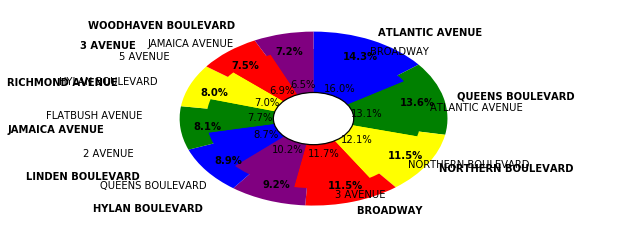

In [64]:
#外側円：原因ごとの事故の地区分布
#外側円：原因ごとの事故の地区分布
colors=["blue","green","yellow","red","purple"]
label1=Cont_S2_sort10_r.index
plt.pie(Cont_S2_sort10,labels=label1,counterclock=False, startangle=90,autopct="%1.1f%%",pctdistance=0.8,colors=colors,textprops={'color': "black", 'weight': "bold"})

#内側円：事故数全体の地区分布
label2=Cont_Street_sort10_r.index
plt.pie(Cont_Street_sort10,labels=label2,counterclock=False, startangle=90,autopct="%1.1f%%",radius=0.8,pctdistance=0.5,colors=colors)

# 中心 (0,0) に 40% の大きさで円を描画
centre_circle = plt.Circle((0,0),0.3,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
#plt.axis('equal')


## Drivers Inattentionについてクラスタリング

In [13]:
data4['VEHICLE TYPE'].value_counts()

PASSENGER VEHICLE                 306004
SPORT UTILITY / STATION WAGON     157744
TAXI                               28671
VAN                                13713
PICK-UP TRUCK                      11935
OTHER                               9716
LARGE COM VEH(6 OR MORE TIRES)      8422
UNKNOWN                             7540
SMALL COM VEH(4 TIRES)              7242
Ohters                              7132
BUS                                 6819
LIVERY VEHICLE                      5937
MOTORCYCLE                          3373
BICYCLE                             3346
Name: VEHICLE TYPE, dtype: int64

In [16]:
DI=data4[data4['CONTRIBUTING FACTOR VEHICLE 1']=='Driver Inattention/Distraction']

In [65]:
DI['hour'].value_counts()
DI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162919 entries, 6 to 1137845
Data columns (total 33 columns):
DATETIME                         162919 non-null datetime64[ns]
BOROUGH                          112718 non-null object
ZIP CODE                         112692 non-null object
LATITUDE                         134972 non-null float64
LONGITUDE                        134972 non-null float64
LOCATION                         134972 non-null object
ON STREET NAME                   126048 non-null object
CROSS STREET NAME                115036 non-null object
OFF STREET NAME                  22640 non-null object
NUMBER OF PERSONS INJURED        162919 non-null int64
NUMBER OF PERSONS KILLED         162919 non-null int64
NUMBER OF PEDESTRIANS INJURED    162919 non-null int64
NUMBER OF PEDESTRIANS KILLED     162919 non-null int64
NUMBER OF CYCLIST INJURED        162919 non-null int64
NUMBER OF CYCLIST KILLED         162919 non-null int64
NUMBER OF MOTORIST INJURED       162919 non-n

レコードの数値化

In [42]:
DI_Cl=DI[['hour','month','weekday']]

In [43]:
# 標準化のためのモジュール
from sklearn.preprocessing import StandardScaler

# 標準化
sc = StandardScaler()
sc.fit(DI_Cl)
DI_Cl_std = sc.transform(DI_Cl)

In [44]:
from sklearn.cluster import KMeans

X = DI_Cl_std

# random_state固定
kmeans = KMeans(init='random',n_clusters=4,random_state=0)
kmeans.fit(X)

labels = kmeans.labels_

In [45]:
label_data = pd.DataFrame(labels,columns=["cl_nm"])

In [46]:
label_data.groupby("cl_nm").size()

cl_nm
0    44184
1    43678
2    29002
3    46055
dtype: int64

In [35]:
# エルボー法
dist_list =[]
for i in range(1,20):
    kmpp = KMeans(n_clusters=i,init='random',n_init=5,max_iter=100,random_state=0)
    kmpp.fit(X)
    dist_list.append(kmpp.inertia_)

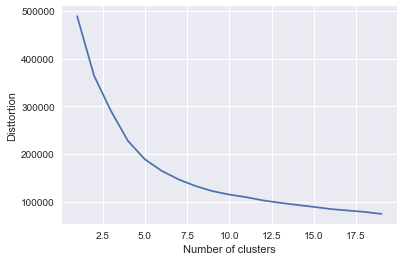

In [36]:
plt.plot(range(1,20),dist_list,marker='+')
plt.xlabel("Number of clusters")
plt.ylabel("Disttortion")

### クラスタリング結果をマージ、グルーピング

In [30]:
pd.DataFrame(label_data).info()
DI_Cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162919 entries, 0 to 162918
Data columns (total 1 columns):
cl_nm    162919 non-null int32
dtypes: int32(1)
memory usage: 636.5 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 162919 entries, 6 to 1137845
Data columns (total 3 columns):
hour       162919 non-null int64
month      162919 non-null int64
weekday    162919 non-null int64
dtypes: int64(3)
memory usage: 10.0 MB


In [82]:
#DI_Clのindexがlabel_dataに対してとびとびになっていたのでそろえる
DI_Cl_1=DI_Cl.reset_index(drop=True)
DI_1=DI.reset_index(drop=True)

In [32]:
DI_Cl_1

,hour,month,weekday
0,0,10,4
1,0,10,4
2,0,10,4
3,0,10,4
4,10,10,4
5,10,10,4
6,10,10,4
7,10,10,4
8,11,10,4
9,11,10,4


In [83]:
merge_data = pd.concat([DI_Cl_1,pd.DataFrame(label_data)],axis=1)
merge_data1 = pd.concat([DI_1,pd.DataFrame(label_data)],axis=1)
merge_data.head()

,hour,month,weekday,cl_nm
0,0,10,4,2
1,0,10,4,2
2,0,10,4,2
3,0,10,4,2
4,10,10,4,2


In [34]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162919 entries, 0 to 162918
Data columns (total 4 columns):
hour       162919 non-null int64
month      162919 non-null int64
weekday    162919 non-null int64
cl_nm      162919 non-null int32
dtypes: int32(1), int64(3)
memory usage: 4.4 MB


### monthでヒートマップ

In [38]:
cluster_num_hour_cross_tb = pd.pivot_table(merge_data , index=['cl_nm'], columns=['hour'],aggfunc='count',fill_value = 0) 
a=cluster_num_hour_cross_tb.iloc[:,0:24]

In [39]:
cluster_num_hour_cross_tb
a

month                                                        ...         \
hour     0     1     2     3     4     5     6     7     8     9   ...     14   
cl_nm                                                              ...          
0         0     0     7    30    70   149   511   868  2115  2404  ...   3512   
1        61    50    53    49    98   216   609  1096  2672  2800  ...   3475   
2      4290  2295  1646  1348  1426  1474  1960  2338  4094  3692  ...      0   
3         0     0     0     0     0     0     0     0     0     0  ...   4377   

                                                             
hour     15    16    17    18    19    20    21    22    23  
cl_nm                                                        
0      3332  4044  3727  3281  2571  2029  1522  1311   946  
1      3168  3665  3627  3069  2393  1708  1362  1091   809  
2         0     0     0     0     0     0     0     0     0  
3      4015  5030  5001  4257  3787  3371  2980  2767  2401  

[4 rows x 24 columns]

In [41]:
a.iloc[0,:].sum()

44184

In [42]:
cluster_num_cnt_tb = pd.pivot_table(merge_data, values='hour', index=['cl_nm'],aggfunc=lambda x : len(x))
cluster_num_cnt_tb

,hour
cl_nm,
0,44184
1,43678
2,29002
3,46055


In [43]:
array=np.array([44184.0,43678.0,29002.0,46055.0])

In [44]:
b=a.div(array,axis=0)
b

month                                                              \
hour         0         1         2         3         4         5         6    
cl_nm                                                                         
0      0.000000  0.000000  0.000158  0.000679  0.001584  0.003372  0.011565   
1      0.001397  0.001145  0.001213  0.001122  0.002244  0.004945  0.013943   
2      0.147921  0.079132  0.056755  0.046480  0.049169  0.050824  0.067582   
3      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                                       ...                                   \
hour         7         8         9     ...           14        15        16   
cl_nm                                  ...                                    
0      0.019645  0.047868  0.054409    ...     0.079486  0.075412  0.091526   
1      0.025093  0.061175  0.064105    ...     0.079560  0.072531  0.083910   
2      0.080615  0.141163  0.127302    ...     0.000000  0.000000  0.000000   
3      0.000000  0.000000  0.000000    ...     0.095039  0.087178  0.109217   

                                                                             
hour         17        18        19        20        21        22        23  
cl_nm                                                                        
0      0.084352  0.074258  0.058188  0.045922  0.034447  0.029671  0.021410  
1      0.083040  0.070264  0.054787  0.039104  0.031183  0.024978  0.018522  
2      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
3      0.108588  0.092433  0.082228  0.073195  0.064705  0.060080  0.052133  

[4 rows x 24 columns]

In [49]:
for i in range(4):
    print(b.iloc[i,:].sum())

1.0
0.9999999999999998
1.0
0.9999999999999999


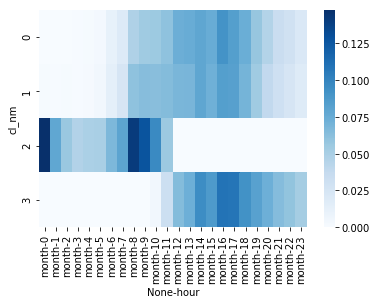

In [47]:
sns.heatmap(b            ,cmap='Blues')

### weekdayでヒートマップ

In [93]:
cluster_num_weekday_cross_tb= pd.pivot_table(merge_data1, index=['cl_nm'], columns=['weekday'],aggfunc='count',fill_value = 0)
cluster_num_weekday_cross_tb
cluster_num_weekday_cross_tb.columns

MultiIndex(levels=[['BOROUGH', 'CONTRIBUTING FACTOR', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'CROSS STREET NAME', 'DATETIME', 'LATITUDE', 'LOCATION', 'LONGITUDE', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'OFF STREET NAME', 'ON STREET NAME', 'UNIQUE KEY', 'VEHICLE TYPE', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5', 'ZIP CODE', 'hour', 'month'], [0, 1, 2, 3, 4, 5, 6]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 10, 10,

In [94]:
c=cluster_num_weekday_cross_tb.iloc[:,0:7]
d=c.div(array,axis=0)
d

In [95]:
d=c.div(array,axis=0)
d

BOROUGH                                                            
weekday         0         1         2         3         4         5         6
cl_nm                                                                        
0        0.186923  0.195229  0.177100  0.115630  0.016363  0.000000  0.000000
1        0.164705  0.170086  0.163583  0.131325  0.064632  0.005449  0.000000
2        0.021826  0.027481  0.064858  0.125681  0.178884  0.148507  0.118164
3        0.000000  0.000000  0.000000  0.053067  0.203148  0.226555  0.206253

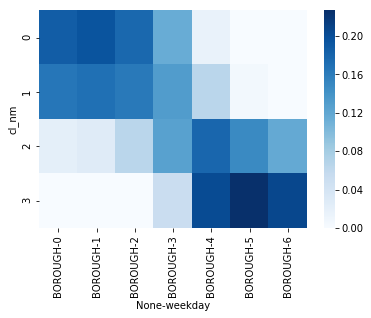

In [96]:
sns.heatmap(d          ,cmap='Blues')

### 各クラスターの内容
1. 平日（月火水）の夕方
2. 平日（月火水）の退勤
3. 金土の深夜～午前
4. 金土日の夕方

### vehicle typeでヒートマップ

In [97]:
cluster_num_vehicle_cross_tb= pd.pivot_table(merge_data1, index=['cl_nm'], columns=['VEHICLE TYPE'],aggfunc='count',fill_value = 0)
cluster_num_vehicle_cross_tb
cluster_num_vehicle_cross_tb.columns

MultiIndex(levels=[['BOROUGH', 'CONTRIBUTING FACTOR', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'CROSS STREET NAME', 'DATETIME', 'LATITUDE', 'LOCATION', 'LONGITUDE', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'OFF STREET NAME', 'ON STREET NAME', 'UNIQUE KEY', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5', 'ZIP CODE', 'hour', 'month', 'weekday'], ['BICYCLE', 'BUS', 'LARGE COM VEH(6 OR MORE TIRES)', 'LIVERY VEHICLE', 'MOTORCYCLE', 'OTHER', 'Ohters', 'PASSENGER VEHICLE', 'PICK-UP TRUCK', 'SMALL COM VEH(4 TIRES) ', 'SPORT UTILITY / STATION WAGON', 'TAXI', 'UNKNOWN', 'VAN']],
           labels=[[0, 0, 0, 0, 0, 0

In [101]:
e=cluster_num_vehicle_cross_tb.iloc[:,0:14]
f=e.div(array,axis=0)
f

BOROUGH                                           \
VEHICLE TYPE   BICYCLE       BUS LARGE COM VEH(6 OR MORE TIRES)   
cl_nm                                                             
0             0.004278  0.011158                       0.010207   
1             0.003640  0.010669                       0.009593   
2             0.004413  0.007586                       0.007620   
3             0.005146  0.006818                       0.004929   

                                                                              \
VEHICLE TYPE LIVERY VEHICLE MOTORCYCLE     OTHER    Ohters PASSENGER VEHICLE   
cl_nm                                                                          
0                  0.007899   0.002852  0.011588  0.009370          0.348814   
1                  0.007372   0.002038  0.013233  0.008975          0.373758   
2                  0.009103   0.002931  0.011758  0.009586          0.358837   
3                  0.006992   0.003648  0.008360  0.005407          0.379459   

                                                    \
VEHICLE TYPE PICK-UP TRUCK SMALL COM VEH(4 TIRES)    
cl_nm                                                
0                 0.014960                0.011045   
1                 0.014263                0.011814   
2                 0.014447                0.007413   
3                 0.010748                0.005711   

                                                                          
VEHICLE TYPE SPORT UTILITY / STATION WAGON      TAXI   UNKNOWN       VAN  
cl_nm                                                                     
0                                 0.192264  0.034696  0.010909  0.021207  
1                                 0.182105  0.031183  0.010555  0.020582  
2                                 0.174436  0.050445  0.011172  0.015654  
3                                 0.190555  0.037781  0.009120  0.014352

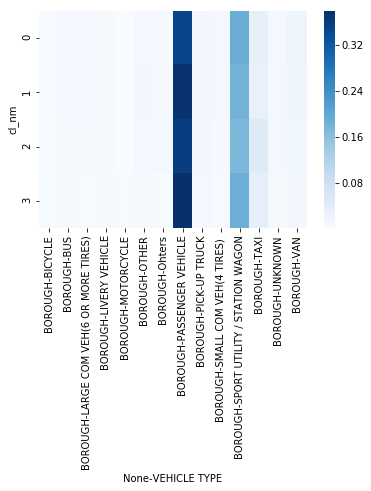

In [102]:
sns.heatmap(f,cmap='Blues')

In [104]:
cluster_num_borough_cross_tb= pd.pivot_table(merge_data1, index=['cl_nm'], columns=['BOROUGH'],aggfunc='count',fill_value = 0)
cluster_num_borough_cross_tb
cluster_num_borough_cross_tb.columns

MultiIndex(levels=[['CONTRIBUTING FACTOR', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'CROSS STREET NAME', 'DATETIME', 'LATITUDE', 'LOCATION', 'LONGITUDE', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'OFF STREET NAME', 'ON STREET NAME', 'UNIQUE KEY', 'VEHICLE TYPE', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5', 'ZIP CODE', 'hour', 'month', 'weekday'], ['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND']],
           labels=[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 11, 11,

In [107]:
g=cluster_num_borough_cross_tb.iloc[:,0:5]
h=g.div(array,axis=0)
h

CONTRIBUTING FACTOR                                            
BOROUGH               BRONX  BROOKLYN MANHATTAN    QUEENS STATEN ISLAND
cl_nm                                                                  
0                  0.082654  0.171601  0.198239  0.205821      0.032930
1                  0.088260  0.179175  0.191469  0.202917      0.037960
2                  0.089373  0.171678  0.208055  0.188815      0.027481
3                  0.076582  0.169927  0.203908  0.206492      0.032114

In [78]:
sns.heatmap(h,cmap='Blues',fontsize=18)

NameError: name 'h' is not defined

In [72]:
merge_data_cluster0

,DATETIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,hour,month,weekday,CONTRIBUTING FACTOR,VEHICLE TYPE,cl_nm
167,2017-10-19 10:00:00,BRONX,10454,40.807700,-73.929550,"(40.8077, -73.92955)",BRUCKNER BOULEVARD,LINCOLN AVENUE,NaN,0,...,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,10,10,3,Driver Inattention/Distraction,SPORT UTILITY / STATION WAGON,0
168,2017-10-19 10:00:00,BRONX,10462,40.844387,-73.862656,"(40.844387, -73.862656)",NaN,NaN,781 VANNEST AVENUE,0,...,NaN,NaN,NaN,NaN,10,10,3,Driver Inattention/Distraction,MOTORCYCLE,0
169,2017-10-19 10:00:00,QUEENS,11434,40.682358,-73.767140,"(40.682358, -73.76714)",MERRICK BOULEVARD,125 AVENUE,NaN,0,...,NaN,NaN,NaN,NaN,10,10,3,Driver Inattention/Distraction,PASSENGER VEHICLE,0
170,2017-10-19 10:10:00,NaN,NaN,40.747090,-73.763250,"(40.74709, -73.76325)",NaN,NaN,NaN,2,...,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,10,10,3,Driver Inattention/Distraction,SPORT UTILITY / STATION WAGON,0
171,2017-10-19 10:15:00,NaN,NaN,40.662920,-73.989050,"(40.66292, -73.98905)",NaN,NaN,NaN,0,...,PASSENGER VEHICLE,NaN,NaN,NaN,10,10,3,Driver Inattention/Distraction,SPORT UTILITY / STATION WAGON,0
172,2017-10-19 10:21:00,QUEENS,11414,40.663067,-73.836880,"(40.663067, -73.83688)",97 STREET,157 AVENUE,NaN,0,...,PASSENGER VEHICLE,NaN,NaN,NaN,10,10,3,Driver Inattention/Distraction,SPORT UTILITY / STATION WAGON,0
173,2017-10-19 10:30:00,MANHATTAN,10021,40.769753,-73.954580,"(40.769753, -73.95458)",EAST 75 STREET,1 AVENUE,NaN,0,...,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,10,10,3,Driver Inattention/Distraction,SPORT UTILITY / STATION WAGON,0
174,2017-10-19 10:30:00,NaN,NaN,40.528667,-74.231880,"(40.528667, -74.23188)",NaN,NaN,2 WAINWRIGHT AVENUE,0,...,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,10,10,3,Driver Inattention/Distraction,SPORT UTILITY / STATION WAGON,0
175,2017-10-19 10:30:00,NaN,NaN,40.662500,-73.804170,"(40.6625, -73.80417)",NaN,NaN,NaN,0,...,PASSENGER VEHICLE,NaN,NaN,NaN,10,10,3,Driver Inattention/Distraction,Ohters,0
176,2017-10-19 10:30:00,BROOKLYN,11215,40.668220,-73.973830,"(40.66822, -73.97383)",3 STREET,PROSPECT PARK WEST,NaN,1,...,BICYCLE,NaN,NaN,NaN,10,10,3,Driver Inattention/Distraction,SPORT UTILITY / STATION WAGON,0


In [84]:
merge_data_cluster0 = merge_data1[merge_data1["cl_nm"]==0]
merge_data_cluster1 = merge_data1[merge_data1["cl_nm"]==1]
merge_data_cluster2 = merge_data1[merge_data1["cl_nm"]==2]
merge_data_cluster3 = merge_data1[merge_data1["cl_nm"]==3]
#merge_data_cluster4 = merge_data[merge_data["cl_nm"]==4]
#merge_data_cluster5 = merge_data[merge_data["cl_nm"]==5]

(40.450, 41)

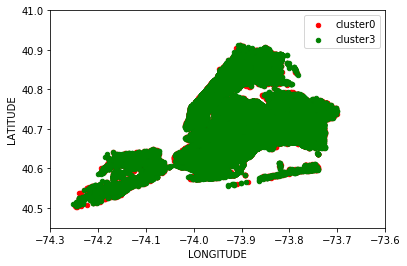

In [88]:
ax =merge_data_cluster0.plot.scatter(x='LONGITUDE', y='LATITUDE', color='red', label='cluster0');
#merge_data_cluster1.plot.scatter(x='LONGITUDE', y='LATITUDE', color='orange', label='cluster1',ax=ax);
#merge_data_cluster2.plot.scatter(x='LONGITUDE', y='LATITUDE', color='yellow', label='cluster2',ax=ax);
merge_data_cluster3.plot.scatter(x='LONGITUDE', y='LATITUDE', color='green', label='cluster3',ax=ax);
#merge_data_cluster4.plot.scatter(x='longitude', y='latitude', color='blue', label='cluster4',ax=ax);
#merge_data_cluster5.plot.scatter(x='longitude', y='latitude', color='purple', label='cluster5',ax=ax);
plt.xlim(-74.3, -73.6)
plt.ylim(40.45, 41)

## weekとlatitude-langitudeでクラスタリングすれば

latitude(40.45,41),langitude(-74.3,-73.6)の範囲で取り出す

In [29]:
p1=DI[DI['LATITUDE']> 40.45 ]
p2=p1[p1['LATITUDE']<41]
p3=p2[p2['LONGITUDE']>-74.3]
p4=p3[p3['LONGITUDE']<-73.6]

In [36]:
Cl2=p4[['LATITUDE','LONGITUDE','weekday']]

In [38]:
# 標準化のためのモジュール
from sklearn.preprocessing import StandardScaler

# 標準化
sc = StandardScaler()
sc.fit(Cl2)
Cl2_std = sc.transform(Cl2)

In [48]:
from sklearn.cluster import KMeans

X = Cl2_std

# random_state固定
kmeans = KMeans(init='random',n_clusters=5,random_state=0)
kmeans.fit(X)

labels2 = kmeans.labels_

In [49]:
label2_data = pd.DataFrame(labels2,columns=["cl_nm"])
label2_data.groupby("cl_nm").size()

cl_nm
0    37534
1    31646
2    27227
3    20797
4    17729
dtype: int64

In [68]:
# エルボー法
dist_list =[]
for i in range(1,20):
    kmpp = KMeans(n_clusters=i,init='random',n_init=5,max_iter=100,random_state=0)
    kmpp.fit(X)
    dist_list.append(kmpp.inertia_)

Text(0,0.5,'Disttortion')

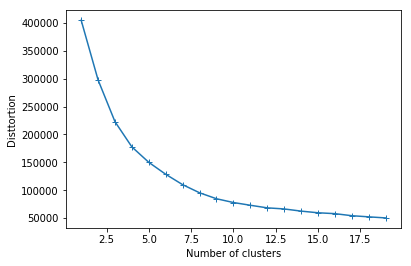

In [69]:
plt.plot(range(1,20),dist_list,marker='+')
plt.xlabel("Number of clusters")
plt.ylabel("Disttortion")

In [50]:
#DI_Clのindexがlabel_dataに対してとびとびになっていたのでそろえる
Cl2_reset=Cl2.reset_index(drop=True)

In [52]:
merge2_data = pd.concat([Cl2_reset,pd.DataFrame(label2_data)],axis=1)

merge2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134933 entries, 0 to 134932
Data columns (total 4 columns):
LATITUDE     134933 non-null float64
LONGITUDE    134933 non-null float64
weekday      134933 non-null int64
cl_nm        134933 non-null int32
dtypes: float64(2), int32(1), int64(1)
memory usage: 3.6 MB


In [54]:
merge_data_cluster0 = merge2_data[merge2_data["cl_nm"]==0]
merge_data_cluster1 = merge2_data[merge2_data["cl_nm"]==1]
merge_data_cluster2 = merge2_data[merge2_data["cl_nm"]==2]
merge_data_cluster3 = merge2_data[merge2_data["cl_nm"]==3]
merge_data_cluster4 = merge2_data[merge2_data["cl_nm"]==4]

(40.450, 41)

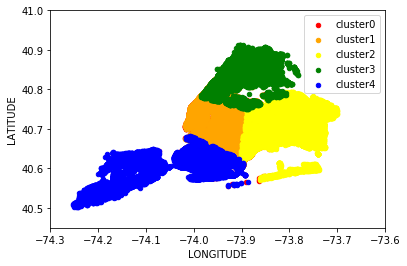

In [65]:
ax =merge_data_cluster0.plot.scatter(x='LONGITUDE', y='LATITUDE', color='red', label='cluster0');
merge_data_cluster1.plot.scatter(x='LONGITUDE', y='LATITUDE', color='orange', label='cluster1',ax=ax);
merge_data_cluster2.plot.scatter(x='LONGITUDE', y='LATITUDE', color='yellow', label='cluster2',ax=ax);
merge_data_cluster3.plot.scatter(x='LONGITUDE', y='LATITUDE', color='green', label='cluster3',ax=ax);
merge_data_cluster4.plot.scatter(x='LONGITUDE', y='LATITUDE', color='blue', label='cluster4',ax=ax);

plt.xlim(-74.3, -73.6)
plt.ylim(40.45, 41)

In [74]:
cluster_num_weekday_cross_tb= pd.pivot_table(merge2_data, index=['cl_nm'], columns=['weekday'],aggfunc='count',fill_value = 0)
cluster_num_weekday_cross_tb
a=cluster_num_weekday_cross_tb.iloc[:,0:7]
#cluster_num_weekday_cross_tb.columns
a

LATITUDE                                      
weekday        0      1     2     3     4     5      6
cl_nm                                                 
0              0      0     0  7194  9924  9983  10433
1          12603  10546  8497     0     0     0      0
2           3014   3955  4765  5085  4820  3329   2259
3           1403   2471  3406  4594  3992  2902   2029
4           2149   3106  3585  3499  3090  1510    790

In [71]:
cluster_num_cnt_tb = pd.pivot_table(merge2_data, values='weekday', index=['cl_nm'],aggfunc=lambda x : len(x))
cluster_num_cnt_tb

,weekday
cl_nm,
0,37534
1,31646
2,27227
3,20797
4,17729


In [72]:
array=np.array([37354,31646,27227,20797,17729])

In [75]:
b=a.div(array,axis=0)
b

LATITUDE                                                            
weekday         0         1         2         3         4         5         6
cl_nm                                                                        
0        0.000000  0.000000  0.000000  0.192590  0.265674  0.267254  0.279301
1        0.398249  0.333249  0.268502  0.000000  0.000000  0.000000  0.000000
2        0.110699  0.145260  0.175010  0.186763  0.177030  0.122268  0.082969
3        0.067462  0.118815  0.163774  0.220897  0.191951  0.139539  0.097562
4        0.121214  0.175193  0.202211  0.197360  0.174291  0.085171  0.044560

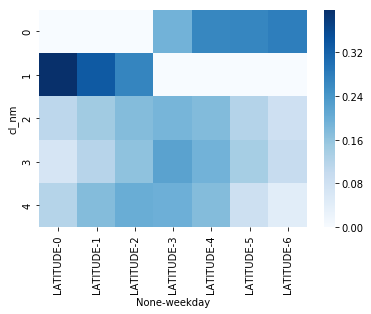

In [76]:
sns.heatmap(b            ,cmap='Blues')